About Dataset

Context
    It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
    The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

    It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

    Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

1. Introduction

    We all know the Importance of good features for machine learning models. In Machine learning task we have features which we need to process to make them good and this is done by data preprocessing tasks.

Data Preprocessing : 

    Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

    A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

Data Preprocessing involves below steps:

    Getting the dataset
    Importing libraries
    Importing datasets
    Finding Missing Data
    Encoding Categorical Data



### 1. Importing libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

### 2. Loading the dataset to a pandas DataFrame

In [3]:
credit_card=pd.read_csv("creditcard.csv")


In [4]:
# First five rows of the dataset

credit_card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
credit_card.tail() # time in second

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
credit_card.shape

(284807, 31)

In [8]:
# Dataset information

credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
credit_card.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# Checking the number of missing values in each column

credit_card.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
credit_card.isnull().values.any()

False

In [10]:
credit_card.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [11]:
# Distribution of legit transcation and frudulanet transaction

credit_card["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

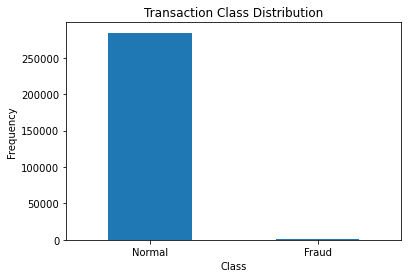

In [19]:
count_classes = pd.value_counts(credit_card["Class"], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

#for i in range(2):
    #print(i)

plt.xlabel("Class")

plt.ylabel("Frequency")

This Dataset is highly unbalanced.

if we put the imbalance dataset into the ml model , when the new data is put at that time it takes non fradulant bcz of unbalance dataset.


0--> normal transaction

1--> Fradulent transaction



In [23]:
## separating tha data for analysis

normal = credit_card[credit_card["Class"]==0]
fraud = credit_card[credit_card["Class"]==1]

In [24]:
print("normal:",normal.shape)
print("fraud:",fraud.shape)

normal: (284315, 31)
fraud: (492, 31)


In [27]:
# stattistical measures of the data

## We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [28]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [35]:
# compare the values for the both transaction

credit_card.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## Under-sampling:


Build a sample datasetcontaining similar distribution of normal transation and fradulent transations


Number of fradulent transastion-->492
    
    

In [36]:
normal_sample = normal.sample(n=492) # undersampling

fraud = fraud.sample(len(normal),replace=True) #oversampling



In [ ]:
# concatinating the two dataframe 



In [39]:
new_dataset =pd.concat([normal_sample,fraud], axis=0) # axis 0= row wise concatinate

In [41]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155070,104398.0,2.019233,-0.179301,-0.360224,0.505099,-0.286374,-0.173293,-0.610716,-0.060173,2.569171,...,-0.352466,-0.644745,0.398512,0.468614,-0.404506,-0.683828,0.003824,-0.032793,3.36,0
163165,115706.0,0.042798,1.015239,0.290874,2.024714,0.888001,-0.571756,1.265778,-0.545343,-0.689023,...,0.107245,0.728123,-0.249438,0.011154,-0.122129,-0.127560,-0.069335,-0.045601,7.80,0
30466,35940.0,1.069672,-0.007685,0.048766,0.467428,-0.182653,-0.577486,0.259216,-0.011315,-0.327667,...,-0.266816,-0.986228,0.149541,0.201273,0.102478,0.134604,-0.068292,0.006157,64.95,0
249572,154472.0,2.211512,-1.077581,-2.134173,-2.864092,-0.445888,-1.436654,-0.086411,-0.399772,0.631488,...,-0.212941,0.037574,-0.035584,-0.504705,0.369458,-0.690149,0.024160,-0.069916,30.00,0
150581,93707.0,1.908342,-1.418173,-0.541493,-0.600126,-1.235479,-0.346719,-1.149989,-0.075177,1.607257,...,0.305731,0.760536,0.072044,0.676812,-0.299442,-0.147872,-0.051074,-0.023276,150.40,0


In [42]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [44]:
new_dataset["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

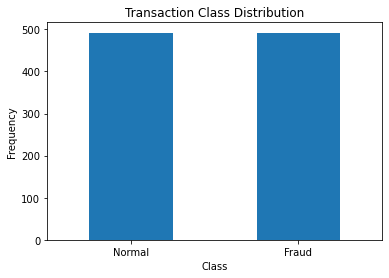

In [45]:
count_classes = pd.value_counts(new_dataset["Class"], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

LABELS = ["Normal", "Fraud"]

plt.xticks(range(2), LABELS)

#for i in range(2):
    #print(i)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [47]:
new_dataset.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,91894.729675,0.044224,-0.020461,0.030925,0.063123,0.007656,0.029753,-0.043621,-0.021265,-0.067370,...,0.010596,-0.000132,0.039973,0.036982,-0.01328,-0.007486,-0.009976,-0.010203,0.006480,88.847154
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [48]:
new_dataset.shape

(984, 31)

In [57]:
new_dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
155070,104398.0,2.019233,-0.179301,-0.360224,0.505099,-0.286374,-0.173293,-0.610716,-0.060173,2.569171,...,-0.352466,-0.644745,0.398512,0.468614,-0.404506,-0.683828,0.003824,-0.032793,3.36,0
163165,115706.0,0.042798,1.015239,0.290874,2.024714,0.888001,-0.571756,1.265778,-0.545343,-0.689023,...,0.107245,0.728123,-0.249438,0.011154,-0.122129,-0.127560,-0.069335,-0.045601,7.80,0
30466,35940.0,1.069672,-0.007685,0.048766,0.467428,-0.182653,-0.577486,0.259216,-0.011315,-0.327667,...,-0.266816,-0.986228,0.149541,0.201273,0.102478,0.134604,-0.068292,0.006157,64.95,0
249572,154472.0,2.211512,-1.077581,-2.134173,-2.864092,-0.445888,-1.436654,-0.086411,-0.399772,0.631488,...,-0.212941,0.037574,-0.035584,-0.504705,0.369458,-0.690149,0.024160,-0.069916,30.00,0
150581,93707.0,1.908342,-1.418173,-0.541493,-0.600126,-1.235479,-0.346719,-1.149989,-0.075177,1.607257,...,0.305731,0.760536,0.072044,0.676812,-0.299442,-0.147872,-0.051074,-0.023276,150.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


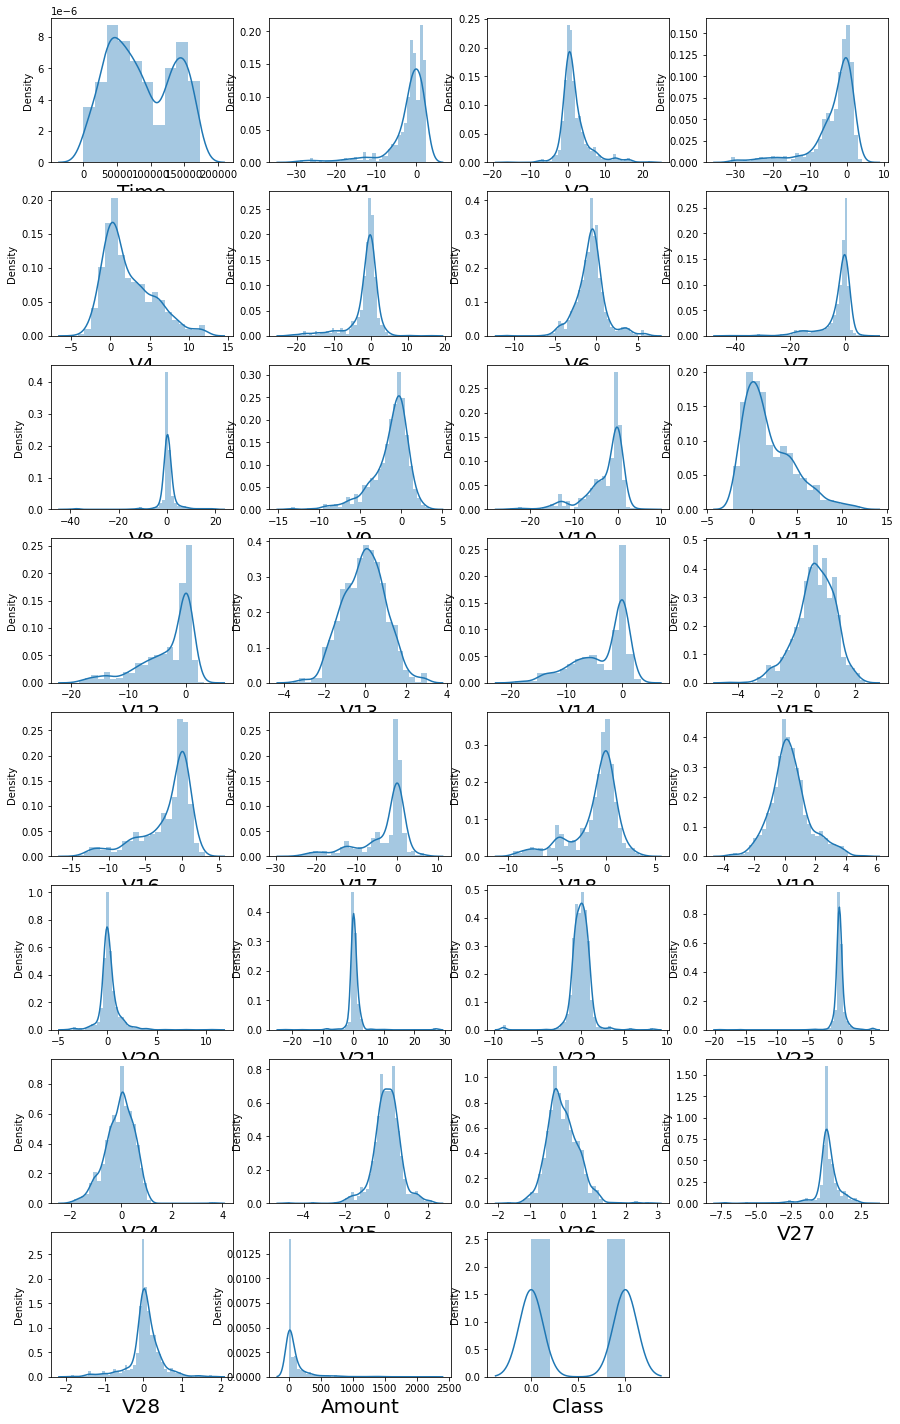

In [59]:
# let's see how data is distributed for every column
plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for column in new_dataset:
    if plotnumber<=32 :     # as there are 30 columns in the data
        ax = plt.subplot(8,4,plotnumber)
        sns.distplot(new_dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#plt.savefig('Distribution plot.png')

## Splitting the data into Feature And targets

In [60]:
X=new_dataset.drop(columns="Class",axis=1)
y=new_dataset["Class"]

In [61]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
155070,104398.0,2.019233,-0.179301,-0.360224,0.505099,-0.286374,-0.173293,-0.610716,-0.060173,2.569171,...,-0.242673,-0.352466,-0.644745,0.398512,0.468614,-0.404506,-0.683828,0.003824,-0.032793,3.36
163165,115706.0,0.042798,1.015239,0.290874,2.024714,0.888001,-0.571756,1.265778,-0.545343,-0.689023,...,0.144699,0.107245,0.728123,-0.249438,0.011154,-0.122129,-0.127560,-0.069335,-0.045601,7.80
30466,35940.0,1.069672,-0.007685,0.048766,0.467428,-0.182653,-0.577486,0.259216,-0.011315,-0.327667,...,-0.072219,-0.266816,-0.986228,0.149541,0.201273,0.102478,0.134604,-0.068292,0.006157,64.95
249572,154472.0,2.211512,-1.077581,-2.134173,-2.864092,-0.445888,-1.436654,-0.086411,-0.399772,0.631488,...,-0.595876,-0.212941,0.037574,-0.035584,-0.504705,0.369458,-0.690149,0.024160,-0.069916,30.00
150581,93707.0,1.908342,-1.418173,-0.541493,-0.600126,-1.235479,-0.346719,-1.149989,-0.075177,1.607257,...,0.156734,0.305731,0.760536,0.072044,0.676812,-0.299442,-0.147872,-0.051074,-0.023276,150.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [62]:
y

155070    0
163165    0
30466     0
249572    0
150581    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

### Split the data into training data and testing dataset.

In [63]:
from sklearn.linear_model import LogisticRegression

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import cross_val_score 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


## model Training 

In [74]:
model_log = LogisticRegression()

model_log.fit(X_train,y_train)

LogisticRegression()

In [75]:
y_hat=model_log.predict(X_train)

print("Train data score","{:.2%}".format(model_log.score(X_train, y_train)))

Train data score 94.03%


In [76]:
y_pred=model_log.predict(X_test)

print("Test data score","{:.2%}".format(model_log.score(X_test, y_test)))

Test data score 91.88%


## Model Evaluation:

#### Accuracy Score:

In [77]:
accuracy_score(y_hat,y_train)

0.940279542566709

In [78]:
accuracy_score(y_pred,y_test)

0.9187817258883249

In [69]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()

rand_clf.fit(X_train,y_train)

y_random_hat=rand_clf.predict(X_train)

print("Train data score","{:.2%}".format(rand_clf.score(X_train, y_train)))

y_random_pred=rand_clf.predict(X_test)

print("Test data score","{:.2%}".format(rand_clf.score(X_test, y_test)))

Train data score 100.00%
Test data score 93.40%
